# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [2]:
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import OneHotEncoder

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Run this cell to connect to your Drive folder

#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
# Load the dataset from your Drive folder

#train = loadmat('path/to/train_32x32.mat')
#test = loadmat('path/to/test_32x32.mat')

In [3]:
# Load the dataset from your folder - I used local instead of google colab 

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [4]:
train_images = train['X']
train_labels = train['y']
test_images = test['X']
test_labels = test['y']

#rescale images  
train_images = train_images/255.
test_images = test_images/255.

In [5]:
# get 10 samples 
sample_indices = random.sample(range(len(train_images[1][1][1])), 10)
sample_images = train_images[:,:,:,sample_indices]
sample_labels = train_labels[sample_indices]

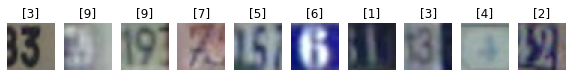

In [6]:
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(sample_images[:,:,:,i])
    ax[i].set_title(str(sample_labels[i]))

In [7]:
# grayscale by taking the average across all colour channels
train_images = np.average(train_images,axis=2)
test_images = np.average(test_images,axis=2)

In [8]:
# get 10 greyscale samples 
sample_indices = random.sample(range(len(train_images[1][1])), 10)
sample_images_grey = train_images[:,:,sample_indices]
sample_labels_grey = train_labels[sample_indices]

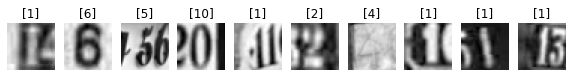

In [9]:
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(sample_images_grey[:,:,i],cmap=plt.get_cmap('gray'))
    ax[i].set_title(str(sample_labels_grey[i]))

In [10]:
#transpose images for model 
test_images=np.transpose(test_images, (2,0,1))[...,np.newaxis]
train_images=np.transpose(train_images, (2,0,1))[...,np.newaxis]

In [11]:
encoder = OneHotEncoder(sparse=False)

train_labels = encoder.fit_transform(train_labels % 10)
test_labels = encoder.fit_transform(test_labels % 10)

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [12]:
from tensorflow.keras.layers import Dropout,Dense,Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential

In [13]:
def get_new_model(input_shape,rate,wd):
    
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128,activation = 'relu',kernel_regularizer=regularizers.l2(wd),name='layer_1'),
        Dense(128,activation = 'relu',kernel_regularizer=regularizers.l2(wd),name='layer_2'),
        Dense(128,activation = 'relu',kernel_regularizer=regularizers.l2(wd),name='layer_3'),
        Dense(128,activation = 'relu',kernel_regularizer=regularizers.l2(wd),name='layer_4'),
        Dense(64,activation = 'relu',kernel_regularizer=regularizers.l2(wd),name='layer_5'),
        Dense(10,activation = 'softmax',name='layer_output')
    ])
    return model

In [14]:
model_MLP = get_new_model(train_images[1].shape,0.2,1e-5)
model_MLP.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
layer_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
layer_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
layer_output (Dense)         (None, 10)                6

2022-08-10 17:15:27.162631: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-10 17:15:27.167541: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [15]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [16]:
class CustomSaver(tf.keras.callbacks.Callback): # this is a try to save specific epochs
    
    # init method or constructor
    def __init__(self, typ):
        self.typ = typ
    
    def on_epoch_end(self, epoch, logs={}):
        checkpoint_path = "model_"+self.typ+"_checkpoints/epoch:{}"
        if epoch % 5 == 0:  # each k-th epoch
            self.model.save(checkpoint_path.format(epoch))

def createCallbacks(typ):
    
    earlyStopping = EarlyStopping(monitor = 'val_loss', patience=10,verbose=1)
    
    saverCallback = CustomSaver(typ)
    
    checkpoint_best_path = 'model_'+typ+'_checkpoints_best/checkpoint'
    checkpoint_best = ModelCheckpoint(filepath = checkpoint_best_path,save_weights_only=True,save_freq='epoch',monitor='val_accuracy',
                                  save_best_only=True,verbose = 1)
    
    plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)
    
    return earlyStopping,saverCallback,checkpoint_best,plateau
    

In [17]:
model_MLP.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [18]:
earlyStopping,saverCallback,checkpoint_best_path,plateau = createCallbacks('MLP')
history_MLP= model_MLP.fit(x=train_images,
                       y=train_labels,
                       epochs = 20,
                       batch_size = 128,
                       callbacks= [earlyStopping, saverCallback, checkpoint_best_path, plateau],
                       validation_split=0.15,
                       verbose=2)

Train on 62268 samples, validate on 10989 samples
Epoch 1/20


2022-08-10 17:16:06.019370: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_MLP_checkpoints/epoch:0/assets

Epoch 00001: val_accuracy improved from -inf to 0.24970, saving model to model_MLP_checkpoints_best/checkpoint
62268/62268 - 14s - loss: 2.1772 - accuracy: 0.2088 - val_loss: 2.0647 - val_accuracy: 0.2497
Epoch 2/20

Epoch 00002: val_accuracy improved from 0.24970 to 0.39904, saving model to model_MLP_checkpoints_best/checkpoint
62268/62268 - 8s - loss: 1.8639 - accuracy: 0.3376 - val_loss: 1.7019 - val_accuracy: 0.3990
Epoch 3/20

Epoch 00003: val_accuracy improved from 0.39904 to 0.50878, saving model to model_MLP_checkpoints_best/checkpoint
62268/62268 - 9s - loss: 1.5984 - accuracy: 0.4457 - val_loss: 1.4507 - val_accuracy: 0.5088
Epoch 4/20

Epoch 00004: val_accuracy improved from 0.50878 to 0.52216, saving model to model_MLP_checkpoints_best/checkpoint
62268/62268 - 10s - loss: 1.4324 - accuracy: 0.5109 - val_loss: 1.4005 - val_

In [19]:
def evaluate_model(model):
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = False)
    print(f"Test accuracy is {test_accuracy}")
    print(f"Test loss is {test_loss}")

In [20]:
def plotting(history):
    
    fig, axs = plt.subplots(2,1, figsize=(10,10))
    axs[0].plot(history['loss'], label = 'training loss')
    axs[0].plot(history['val_loss'], label = 'validation loss')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].grid(True)
    
    axs[1].plot(history['val_accuracy'], label = 'validation accuracy',color = 'orange')
    axs[1].plot(history['accuracy'], label = 'training accuracy',color = 'blue')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    axs[0].grid(True)
    
    axs[1].legend()
    axs[0].legend()
    
    plt.show()
    

In [21]:
evaluate_model(model_MLP)

Test accuracy is 0.5831284523010254
Test loss is 1.309795838378292


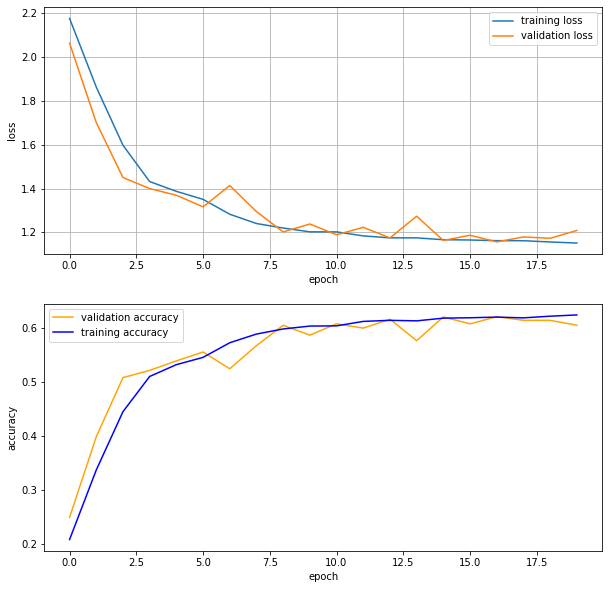

In [22]:
plotting(history_MLP.history)

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [23]:
from tensorflow.keras.layers import Flatten, MaxPooling2D, BatchNormalization, Dropout, Conv2D

def get_new_2_model(input_shape,rate,wd):
    model = Sequential([
        Conv2D(filters=16, input_shape=input_shape, kernel_size=(3, 3), 
               activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dropout(rate),
        Dense(units=32, activation='relu', name='dense_2'),
        BatchNormalization(),
        Dense(units=10, activation='softmax', name='output')
    ])
    
    return model 

In [24]:
model = get_new_2_model(train_images[1].shape,0.2,1e-5)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 16)        160       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 8)         1160      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [25]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [26]:
earlyStopping,saverCallback,checkpoint_best_path,plateau = createCallbacks('CNN')
history_CNN= model.fit(x=train_images,
                       y=train_labels,
                       epochs = 20,
                       batch_size = 128,
                       callbacks= [earlyStopping, saverCallback, checkpoint_best_path, plateau],
                       validation_split=0.15,
                       verbose=2)

Train on 62268 samples, validate on 10989 samples
Epoch 1/20
INFO:tensorflow:Assets written to: model_CNN_checkpoints/epoch:0/assets

Epoch 00001: val_accuracy improved from -inf to 0.61607, saving model to model_CNN_checkpoints_best/checkpoint
62268/62268 - 36s - loss: 1.6368 - accuracy: 0.4399 - val_loss: 1.3120 - val_accuracy: 0.6161
Epoch 2/20

Epoch 00002: val_accuracy improved from 0.61607 to 0.75748, saving model to model_CNN_checkpoints_best/checkpoint
62268/62268 - 29s - loss: 1.0140 - accuracy: 0.6725 - val_loss: 0.7938 - val_accuracy: 0.7575
Epoch 3/20

Epoch 00003: val_accuracy improved from 0.75748 to 0.76513, saving model to model_CNN_checkpoints_best/checkpoint
62268/62268 - 29s - loss: 0.8776 - accuracy: 0.7195 - val_loss: 0.7497 - val_accuracy: 0.7651
Epoch 4/20

Epoch 00004: val_accuracy improved from 0.76513 to 0.79225, saving model to model_CNN_checkpoints_best/checkpoint
62268/62268 - 29s - loss: 0.8219 - accuracy: 0.7354 - val_loss: 0.6764 - val_accuracy: 0.7922
E

In [27]:
evaluate_model(model)

Test accuracy is 0.8319376111030579
Test loss is 0.5456908703738733


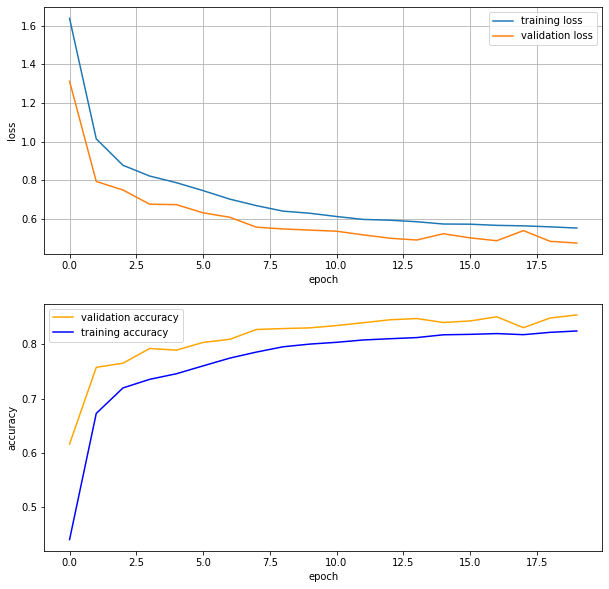

In [28]:
plotting(history_CNN.history)

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [29]:
def compileModel(model):
    model.compile(
          optimizer = 'adam',
          loss = 'categorical_crossentropy',
          metrics = ['accuracy']
    )

In [30]:
checkpoint_best_MLP = 'model_MLP_checkpoints_best/checkpoint'
checkpoint_best_CNN = 'model_CNN_checkpoints_best/checkpoint'

model_MLP = get_new_model(train_images[1].shape,0.2,1e-5)
model_CNN = get_new_2_model(train_images[1].shape,0.2,1e-5)
compileModel(model_MLP)
compileModel(model_CNN)

model_MLP.load_weights(checkpoint_best_MLP)
model_CNN.load_weights(checkpoint_best_CNN)

In [31]:
print('MLP accuracy:\n')
evaluate_model(model_MLP)
print('\nCNN accuracy:\n')
evaluate_model(model_CNN)

MLP accuracy:

Test accuracy is 0.5958051681518555
Test loss is 1.257245532705803

CNN accuracy:

Test accuracy is 0.8319376111030579
Test loss is 0.5456908703738733


In [32]:
# get 5 test cases  
sample_indices = random.sample(range(len(test_images)), 5)
new_test_images = test_images[sample_indices,:,:]
new_test_labels = test_labels[sample_indices]
new_test_labels = np.argmax(new_test_labels,axis=1)

In [33]:
def plotImages(model):
    fig, ax = plt.subplots(1, 5, figsize=(10, 10))

    preds = {}
    for j in range(5):
        predictions = model.predict(new_test_images[j][np.newaxis, ...])
        preds[j]=predictions
        fig.suptitle('')
        #ax[i].set_axis_off()
        ax[j].imshow(new_test_images[j,:,:],cmap=plt.get_cmap('gray'))
        ax[j].set_xlabel(str(np.argmax(predictions)))
        fig.tight_layout()
    plt.show()   
    return preds

Images and Predictions MLP


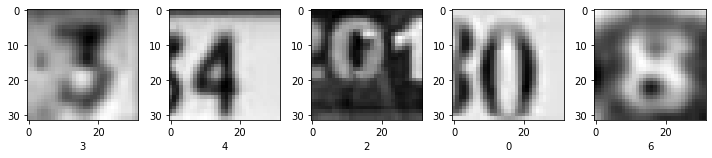

In [34]:
print('Images and Predictions MLP')
preds_MLP=plotImages(model_MLP)

Images and Predictions CNN


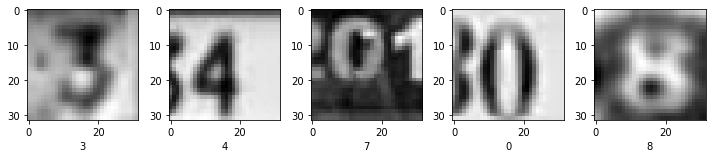

In [35]:
print('Images and Predictions CNN')
preds_CNN=plotImages(model_CNN)

/Users/metehangelgi/opt/anaconda3/envs/summerProj/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


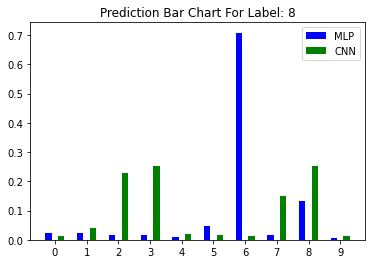

In [38]:
i = 4
interesting_result= new_test_images[i]
interesting_result_label= new_test_labels[i]
fig, ax = plt.subplots()
keys = range(10)
ax.bar(np.arange(len(keys)) - 0.2, 
       preds_MLP[i][0],
       width=0.2,
       color='b',
       align='center', label = 'MLP')
ax.bar(np.arange(len(keys)) + 0.2,
       preds_CNN[i][0],
       width=0.2, 
       color='g', 
       align='center',label = 'CNN')
ax.legend()
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
ax.set_title('Prediction Bar Chart For Label: '+str(interesting_result_label))

plt.show()